---
---
# Strategic Growth Analysis
---
---
## Comprehensive Business Intelligence for Unique Gifts Ltd.

**Project Overview:**
This notebook contains a comprehensive analysis of transactional data from Unique Gifts Ltd., a UK-based online retailer. The analysis follows a structured approach to provide data-driven strategic insights and recommendations.

**Business Objectives:**
1. Sales Performance & Seasonality Analysis
2. Product Portfolio Optimization
3. Geographic Market Analysis
4. Customer Segmentation using RFM Analysis
5. Wholesaler vs. Retail Customer Analysis
6. Data Enrichment via API Integration

---

## Setup and Data Loading

In [1]:
# Import required libraries
import sys
import os

# Add the src directory to Python path
sys.path.append('../src')

# Import our custom RFM analyzer
from utility_functions import load_and_validate_data
from data_cleaning import clean_dataset
from rfm_segmentation import run_complete_analysis, generate_visualizations, export_results

# Standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')
# Set Seaborn styling
sns.set(style='whitegrid', palette='pastel')
# Set display options
pd.set_option('display.max_columns', None) # Display all columns of the DataFrame without truncation
pd.set_option('display.max_rows', 100) # Display a maximum of 100 rows in the DataFrame

print("📦 All libraries imported successfully!")
print(f"📅 Analysis Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

📦 All libraries imported successfully!
📅 Analysis Date: 2025-08-24 09:27:04


# Phase 1: Data Sanitation and Preprocessing
---

**Team:** Code Serpents

**Team Member:** S. M. L. Lakshan jayawardhana

---

## Executive Summary

This notebook focuses on cleaning and preparing the raw transactional data for "Unique Gifts Ltd." The preprocessing phase ensures data quality and creates essential features needed for subsequent analysis, transforming messy raw data into a reliable, analysis-ready dataset.

## Objectives

1. **Data Loading**: Ingest the online_retail.csv file into a Pandas DataFrame
2. **Data Assessment**: Conduct preliminary audit to identify data quality issues
3. **Data Cleaning**: Handle duplicates, missing values, and invalid records
4. **Feature Engineering**: Create new columns for temporal analysis and revenue calculation
5. **Data Type Conversion**: Ensure proper data types for all columns

---

In [2]:
# Load and clean the dataset
print("=" * 60)
print("PHASE 1: DATA SANITATION AND PREPROCESSING")
print("=" * 60)

# Note: Place the online_retail.csv file in the ../data/ directory
data_file_path = "../data/online_retail.csv"

# Clean the dataset using our custom function
df = clean_dataset(data_file_path)

if df is not None:
    print("\n✓ Data cleaning completed successfully!")
    
    # Display basic information about the cleaned dataset
    print("\nCleaned Dataset Info:")
    print(df.info())
    
    # Display first few rows
    print("\nFirst 5 rows of cleaned data:")
    display(df.head())
    
    # Display basic information about the dataset
    print("\n📊 Dataset Overview:")
    print(f"Shape: {df.shape}")
    print(f"Date Range: {df['InvoiceDate'].min()} to {df['InvoiceDate'].max()}")
    print(f"Unique Customers: {df['Customer ID'].nunique():,}")
    print(f"Total Transactions: {df['Invoice'].nunique():,}")
    print(f"Total Revenue: £{df['TotalPrice'].sum():,.2f}")
    
    # Save the cleaned dataset
    output_file_path = "../data/online_retail_clean.csv"
    df.to_csv(output_file_path, index=False)
    print(f"\n💾 Cleaned data saved to: {output_file_path}")
else:
    print("❌ Error: Could not load the dataset.")
    print("Please ensure the 'online_retail.csv' file is placed in the '../data/' directory.")

PHASE 1: DATA SANITATION AND PREPROCESSING
=== STARTING DATA CLEANING PIPELINE ===

Data loaded successfully. Shape: (1067371, 8)
=== INITIAL DATA ASSESSMENT ===
Dataset Shape: (1067371, 8)
Total Duplicates: 34335
Memory Usage: 345.12 MB

Missing Values:
  Description: 4382 (0.41%)
  Customer ID: 243007 (22.77%)


=== CLEANING STEPS ===
Duplicates removed: 34335
Rows with missing Customer ID removed: 235151
Cancelled orders removed: 18390
Zero-price records removed: 70
Non-product records removed: 2583

=== FEATURE ENGINEERING ===
TotalPrice column created
Temporal features created
Data types converted

=== CLEANING COMPLETE ===
Final dataset shape: (776842, 15)
Data range: 2009-12-01 07:45:00 to 2011-12-09 12:50:00

✓ Data cleaning completed successfully!

Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 776842 entries, 0 to 1067369
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,Year,Month,DayOfWeek,HourOfDay,DayName,MonthName
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4,2009,12,1,7,Tuesday,December
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,2009,12,1,7,Tuesday,December
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,2009,12,1,7,Tuesday,December
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8,2009,12,1,7,Tuesday,December
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0,2009,12,1,7,Tuesday,December



📊 Dataset Overview:
Shape: (776842, 15)
Date Range: 2009-12-01 07:45:00 to 2011-12-09 12:50:00
Unique Customers: 5,853
Total Transactions: 36,615
Total Revenue: £17,081,752.61

💾 Cleaned data saved to: ../data/online_retail_clean.csv


# Phase 2: Exploratory Data Analysis & Insight Generation
---

**Team:** Code Serpents

**Team Member:** A. M. Supun Madhuranga

---

## Executive Summary

This notebook conducts comprehensive exploratory data analysis to uncover patterns, trends, and business insights from the cleaned dataset. The analysis addresses key business questions around sales performance, seasonality, geographic distribution, and product portfolio optimization.

## Objectives

1. **Temporal Analysis**: Identify sales trends, seasonality patterns, and peak shopping periods
2. **Geographic Analysis**: Analyze revenue distribution across domestic and international markets
3. **Product Performance**: Identify top products by quantity sold and revenue generated
4. **Behavioral Patterns**: Analyze shopping patterns by day of week and hour of day

---

### 2.1 Temporal & Behavioral Sales Analysis
---

✅ Data loaded successfully: 776842 rows, 15 columns
✅ All required columns are present


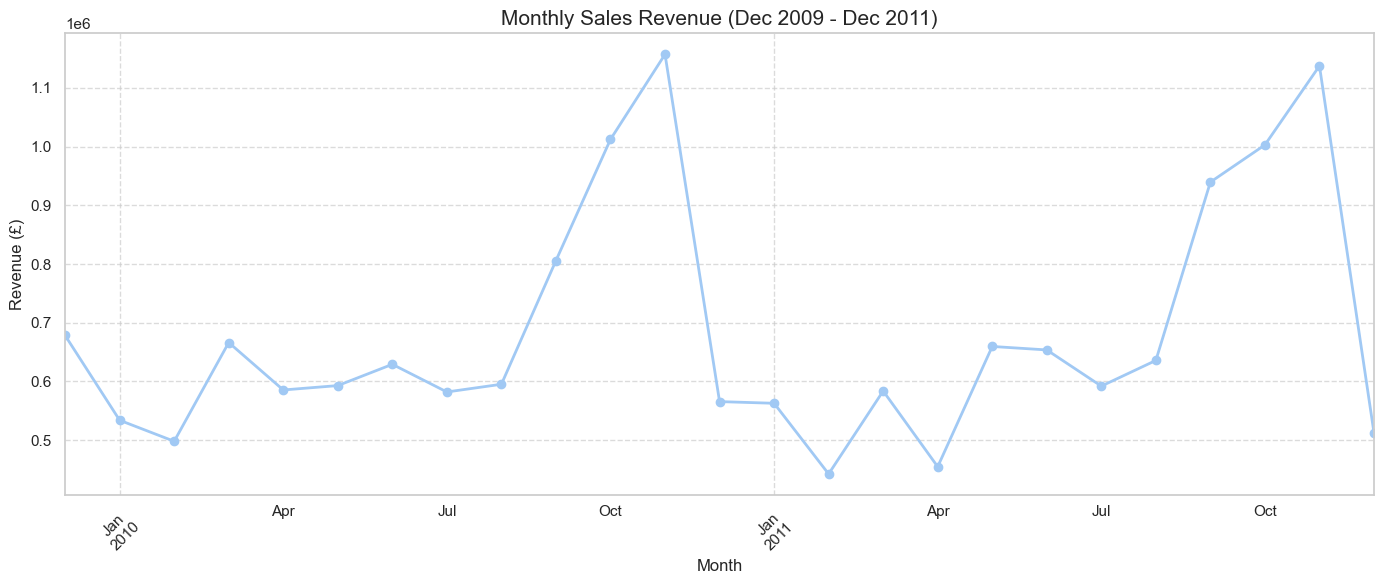

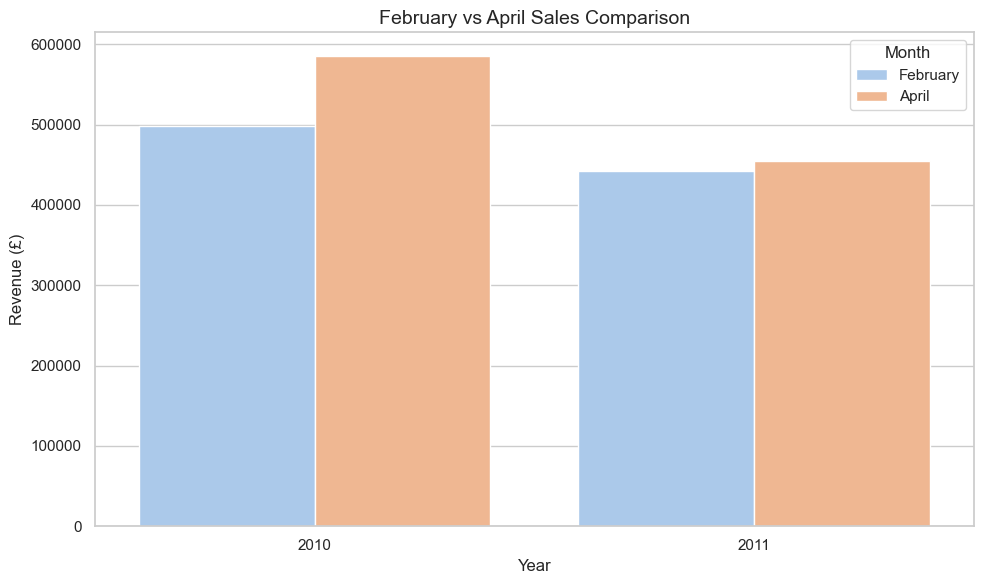

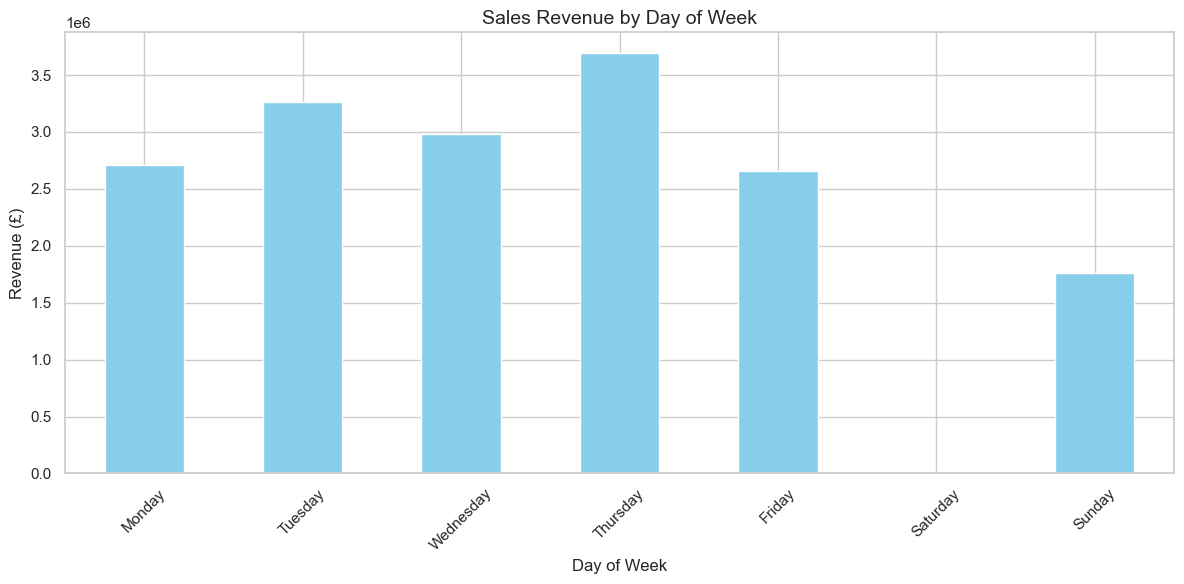

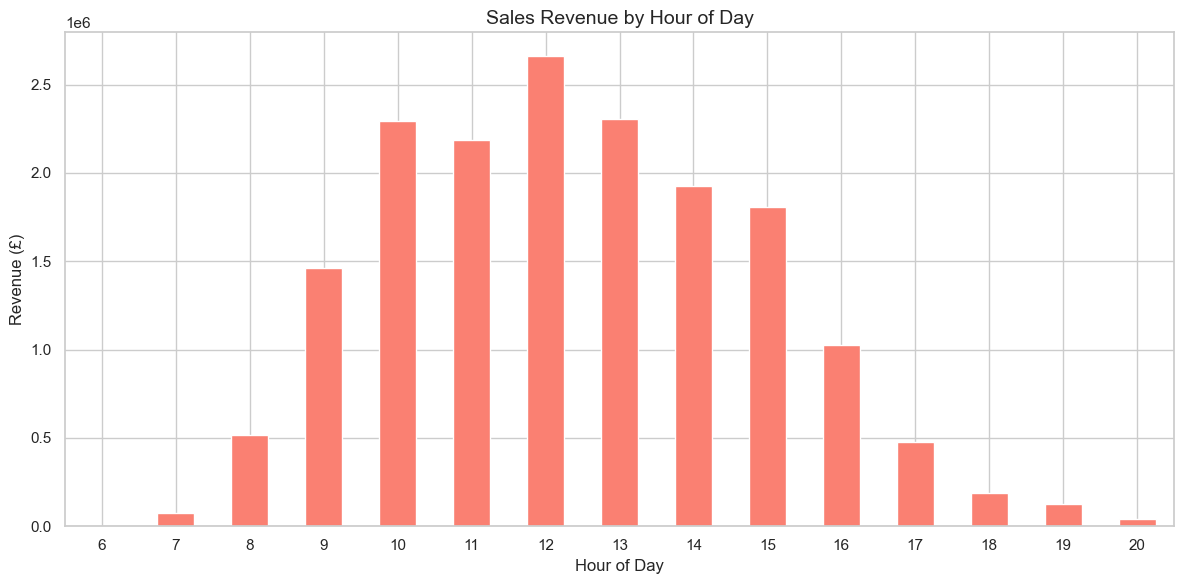

In [3]:
# Load and validate the cleaned dataset
df = load_and_validate_data("../data/online_retail_clean.csv")

# Monthly Sales Revenue Analysis
monthly_sales = df.set_index('InvoiceDate').resample('M')['TotalPrice'].sum()

plt.figure(figsize=(14, 6))
monthly_sales.plot(kind='line', marker='o', linewidth=2)
plt.title('Monthly Sales Revenue (Dec 2009 - Dec 2011)', fontsize=15)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Revenue (£)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../figures/temporal/monthly_sales.png', dpi=300)
plt.show()

# Investigate February and April dips
feb_apr_comparison = monthly_sales[monthly_sales.index.month.isin([2,4])]
feb_apr_comparison = feb_apr_comparison.reset_index()
feb_apr_comparison['Year'] = feb_apr_comparison['InvoiceDate'].dt.year
feb_apr_comparison['Month'] = feb_apr_comparison['InvoiceDate'].dt.month_name()

plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='TotalPrice', hue='Month', data=feb_apr_comparison)
plt.title('February vs April Sales Comparison', fontsize=14)
plt.ylabel('Revenue (£)', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.tight_layout()
plt.savefig('../figures/temporal/feb_apr_comparison.png', dpi=300)
plt.show()

# Daily and Hourly Sales Patterns
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
df['HourOfDay'] = df['InvoiceDate'].dt.hour

# Daily pattern
daily_sales = df.groupby('DayOfWeek')['TotalPrice'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

plt.figure(figsize=(12, 6))
daily_sales.plot(kind='bar', color='skyblue')
plt.title('Sales Revenue by Day of Week', fontsize=14)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Revenue (£)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../figures/temporal/daily_sales.png', dpi=300)
plt.show()

# Hourly pattern
hourly_sales = df.groupby('HourOfDay')['TotalPrice'].sum()

plt.figure(figsize=(12, 6))
hourly_sales.plot(kind='bar', color='salmon')
plt.title('Sales Revenue by Hour of Day', fontsize=14)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Revenue (£)', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('../figures/temporal/hourly_sales.png', dpi=300)
plt.show()

This section addresses **Objective 1 (Temporal Analysis)** and **Objective 4 (Behavioral Patterns)**.
- **Monthly Trends:** Analyzing overall sales trends, seasonality, and investigating specific dips in February and April.
- **Behavioral Patterns:** Identifying the highest revenue-generating days of the week and hours of the day.

### 2.2 Geographic Revenue Analysis
---

UK Contribution: 83.67%
International Contribution: 16.33%


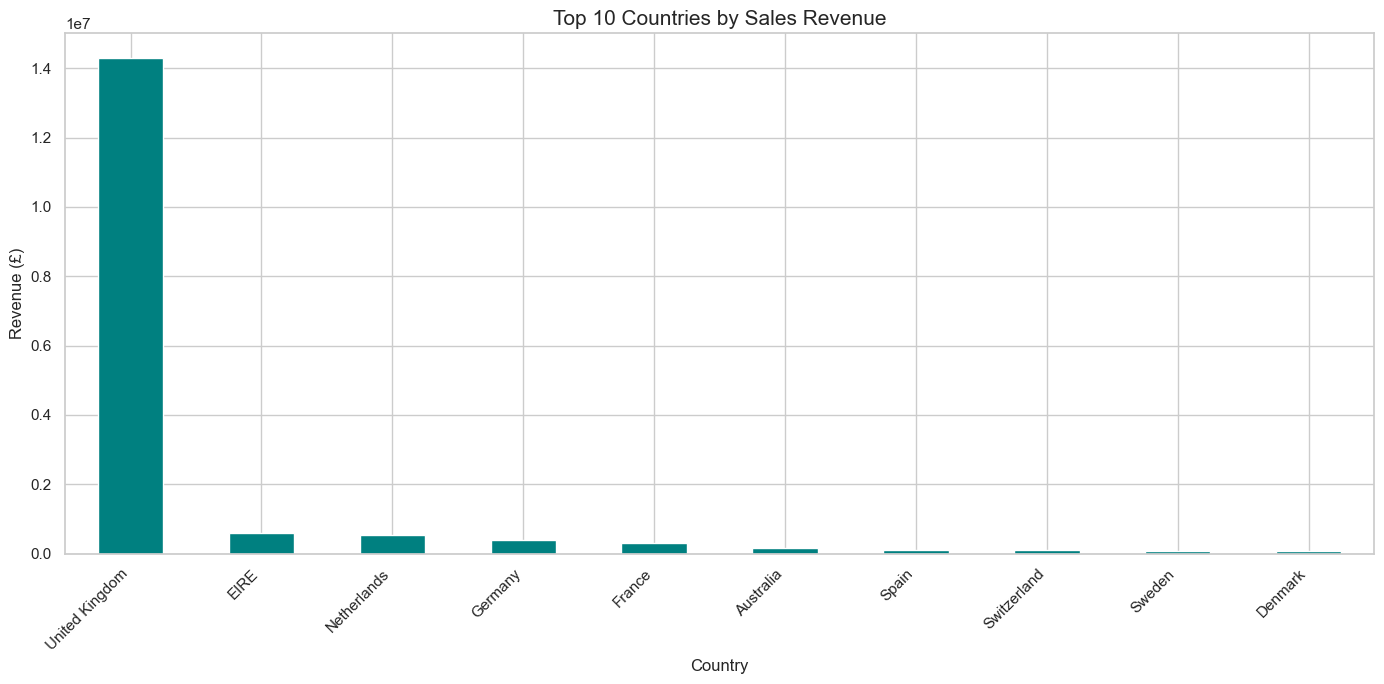

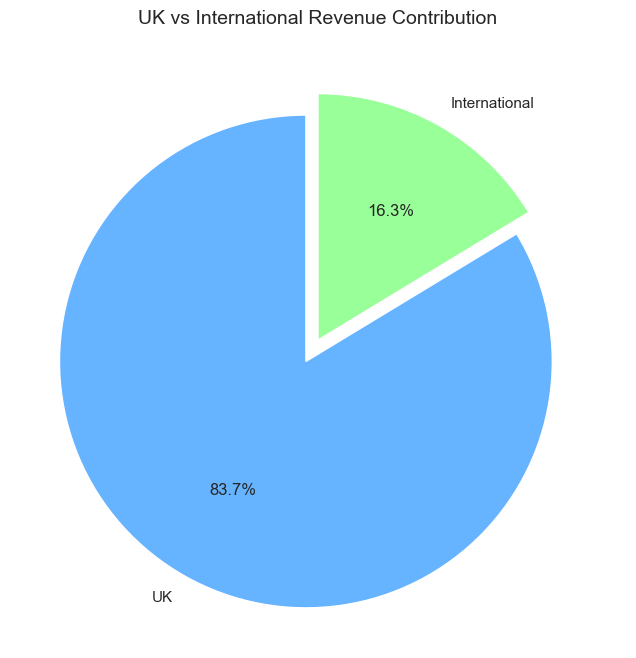

In [4]:
country_revenue = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)
top_10_countries = country_revenue.head(10)

# UK vs International revenue
uk_revenue = country_revenue.get('United Kingdom', 0)
international_revenue = country_revenue.sum() - uk_revenue
uk_percentage = (uk_revenue / country_revenue.sum()) * 100

print(f"UK Contribution: {uk_percentage:.2f}%")
print(f"International Contribution: {100 - uk_percentage:.2f}%")

# Visualization
plt.figure(figsize=(14, 7))
top_10_countries.plot(kind='bar', color='teal')
plt.title('Top 10 Countries by Sales Revenue', fontsize=15)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Revenue (£)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('../figures/geographic/country_revenue.png', dpi=300)
plt.show()

# Pie chart for UK vs International
plt.figure(figsize=(8, 8))
plt.pie([uk_percentage, 100 - uk_percentage],
        labels=['UK', 'International'],
        autopct='%1.1f%%',
        colors=['#66b3ff','#99ff99'],
        startangle=90,
        explode=(0.1, 0))
plt.title('UK vs International Revenue Contribution', fontsize=14)
plt.savefig('../figures/geographic/uk_vs_international.png', dpi=300)
plt.show()

This section addresses **Objective 2 (Geographic Analysis)**.
- **Market Distribution:** Identifying the top 10 countries by sales revenue and analyzing the contribution of the domestic UK market versus international sales.
- **Strategic Insight:** Understanding the geographic footprint of the business to prioritize market efforts.

### 2.3 Product Performance Analysis
---

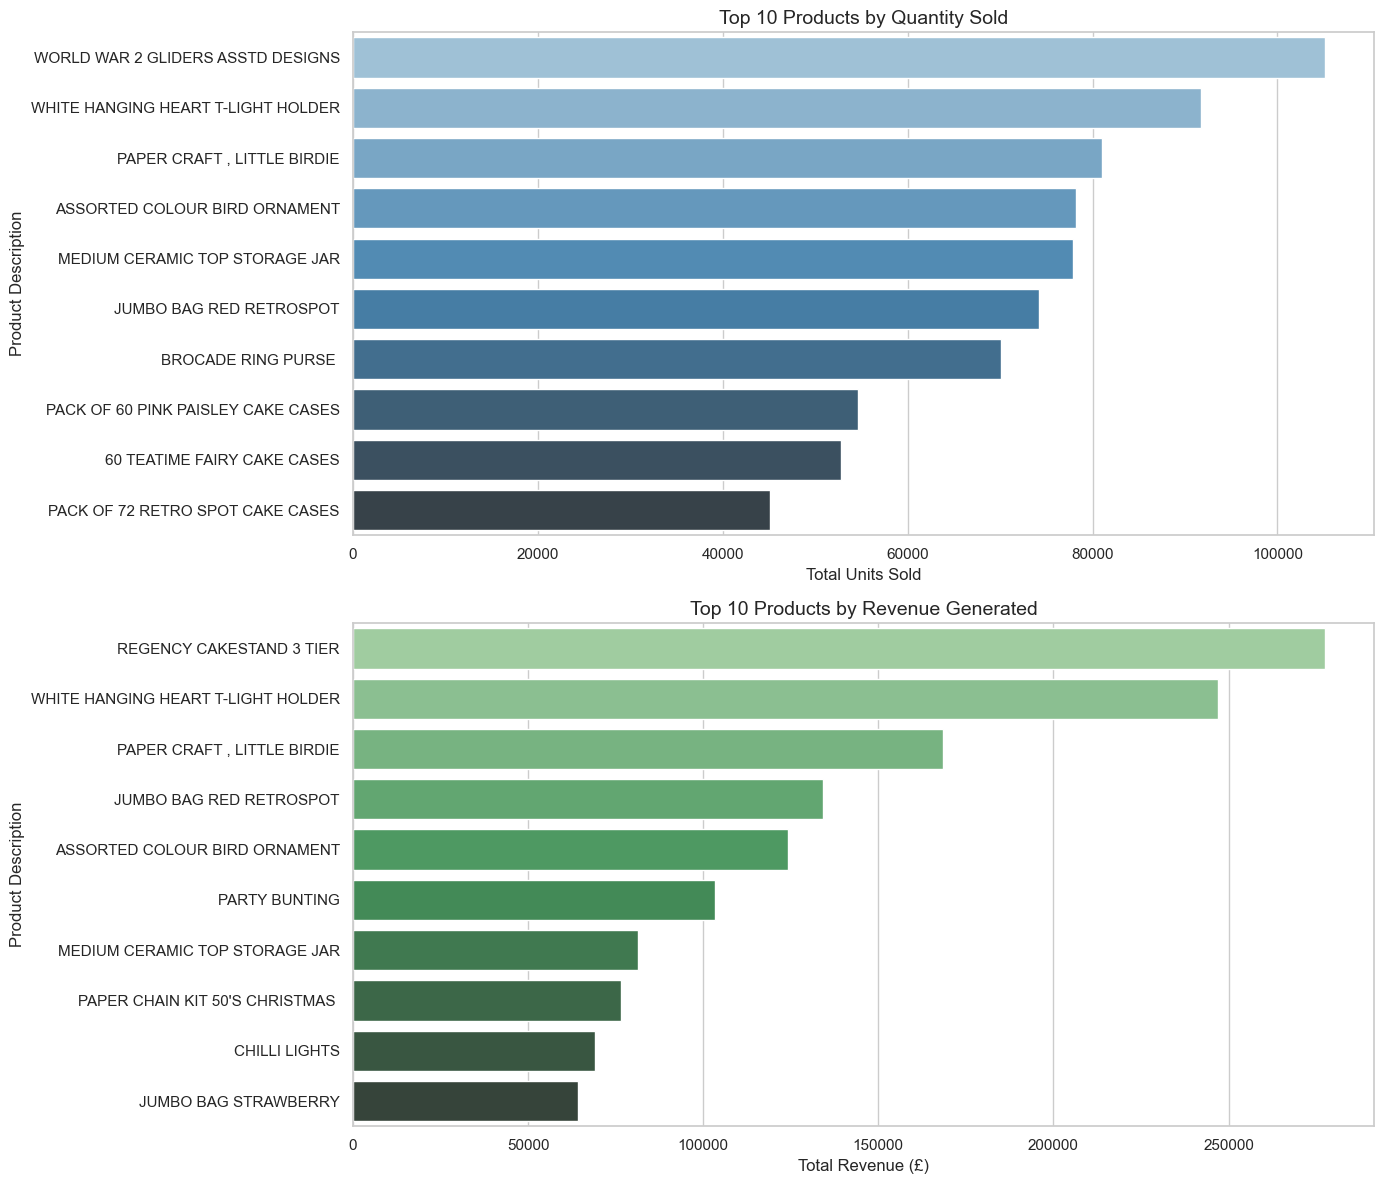


Product Portfolio Comparison:
Products appearing in both top lists: 5
Quantity-only products: 5
Revenue-only products: 5

Comparison Table:


,Description,TotalQuantity,TotalRevenue
0,60 TEATIME FAIRY CAKE CASES,52828.0,Not in Top 10
1,ASSORTED COLOUR BIRD ORNAMENT,78234.0,124351.86
2,BROCADE RING PURSE,70082.0,Not in Top 10
3,CHILLI LIGHTS,Not in Top 10,69084.3
4,JUMBO BAG RED RETROSPOT,74224.0,134307.44
5,JUMBO BAG STRAWBERRY,Not in Top 10,64127.77
6,MEDIUM CERAMIC TOP STORAGE JAR,77916.0,81416.73
7,PACK OF 60 PINK PAISLEY CAKE CASES,54592.0,Not in Top 10
8,PACK OF 72 RETRO SPOT CAKE CASES,45129.0,Not in Top 10
9,PAPER CHAIN KIT 50'S CHRISTMAS,Not in Top 10,76598.18


In [5]:
product_performance = df.groupby(['StockCode', 'Description']).agg(
    TotalQuantity=('Quantity', 'sum'),
    TotalRevenue=('TotalPrice', 'sum')
).reset_index()

# Top 10 by quantity
top_10_quantity = product_performance.sort_values('TotalQuantity', ascending=False).head(10)

# Top 10 by revenue
top_10_revenue = product_performance.sort_values('TotalRevenue', ascending=False).head(10)

# Visualizations
fig, ax = plt.subplots(2, 1, figsize=(14, 12))

# Quantity plot
sns.barplot(x='TotalQuantity', y='Description', data=top_10_quantity,
            ax=ax[0], palette='Blues_d')
ax[0].set_title('Top 10 Products by Quantity Sold', fontsize=14)
ax[0].set_xlabel('Total Units Sold', fontsize=12)
ax[0].set_ylabel('Product Description', fontsize=12)

# Revenue plot
sns.barplot(x='TotalRevenue', y='Description', data=top_10_revenue,
            ax=ax[1], palette='Greens_d')
ax[1].set_title('Top 10 Products by Revenue Generated', fontsize=14)
ax[1].set_xlabel('Total Revenue (£)', fontsize=12)
ax[1].set_ylabel('Product Description', fontsize=12)

plt.tight_layout()
plt.savefig('../figures/products/product_performance.png', dpi=300)
plt.show()

# Comparison analysis
comparison_df = pd.merge(
    top_10_quantity[['Description']],
    top_10_revenue[['Description']],
    on='Description',
    how='outer',
    indicator=True
)

print("\nProduct Portfolio Comparison:")
print(f"Products appearing in both top lists: {comparison_df[comparison_df['_merge'] == 'both'].shape[0]}")
print(f"Quantity-only products: {comparison_df[comparison_df['_merge'] == 'left_only'].shape[0]}")
print(f"Revenue-only products: {comparison_df[comparison_df['_merge'] == 'right_only'].shape[0]}")

# Create a comparison table
comparison_table = pd.merge(
    top_10_quantity[['Description', 'TotalQuantity']],
    top_10_revenue[['Description', 'TotalRevenue']],
    on='Description',
    how='outer'
).fillna('Not in Top 10')

print("\nComparison Table:")
display(comparison_table)

This section addresses **Objective 3 (Product Performance)**.
- **Portfolio Analysis:** Identifying the top 10 products by both quantity sold and revenue generated.
- **Strategic Comparison:** Contrasting high-volume products with high-value products to inform inventory, marketing, and pricing strategies.

# Phase 3: Advanced Analytics - RFM Customer Segmentation
---

**Team:** Code Serpents

**Team Member:** G. A. Dilsara Thiranjaya

---

## Executive Summary

This notebook implements a comprehensive RFM (Recency, Frequency, Monetary) analysis to segment customers of "Unique Gifts Ltd." based on their purchasing behavior. The analysis will help identify high-value customers, at-risk segments, and opportunities for targeted marketing strategies.

## Objectives

1. **Calculate RFM Metrics**: Compute Recency, Frequency, and Monetary values for each customer
2. **Assign RFM Scores**: Use quintile-based scoring (1-5) for each RFM dimension
3. **Customer Segmentation**: Map RFM scores to descriptive business segments

---

### 3.1 Run Complete RFM Analysis
---

In [6]:
# Load and validate the cleaned dataset
df = load_and_validate_data("../data/online_retail_clean.csv")

# Execute the complete RFM analysis workflow
results = run_complete_analysis(df)

# Extract results for easy access
rfm_data = results['rfm_data']
rfm_scored = results['rfm_scored']
rfm_final = results['rfm_final']
segment_summary = results['segment_summary']
summary_stats = results['summary_stats']

print("\n✅ RFM Analysis completed successfully!")

✅ Data loaded successfully: 776842 rows, 15 columns
✅ All required columns are present
🔄 Starting RFM Analysis...
Data validation passed. All required columns are present.
✅ RFM Analysis Complete!

✅ RFM Analysis completed successfully!


### 3.2 RFM Metrics Analysis
---
#### Basic RFM Statistics

In [7]:
# Display comprehensive summary statistics
print("📈 RFM ANALYSIS SUMMARY STATISTICS")
print("=" * 50)

print(f"\n🔍 Analysis Overview:")
print(f"Total Customers Analyzed: {summary_stats['total_customers']:,}")
print(f"Analysis Period: {summary_stats['data_period']['start_date'].strftime('%Y-%m-%d')} to {summary_stats['data_period']['end_date'].strftime('%Y-%m-%d')}")
print(f"Snapshot Date: {summary_stats['snapshot_date'].strftime('%Y-%m-%d')}")

print(f"\n📊 Recency Statistics (Days since last purchase):")
print(summary_stats['recency_stats'])

print(f"\n🔄 Frequency Statistics (Number of transactions):")
print(summary_stats['frequency_stats'])

print(f"\n💰 Monetary Statistics (Total spent in £):")
print(summary_stats['monetary_stats'])

# Display sample of RFM data
print("\n📋 Sample RFM Data:")
display(rfm_data.head(10))

📈 RFM ANALYSIS SUMMARY STATISTICS

🔍 Analysis Overview:
Total Customers Analyzed: 5,853
Analysis Period: 2009-12-01 to 2011-12-09
Snapshot Date: 2011-12-10

📊 Recency Statistics (Days since last purchase):
count    5853.000000
mean      200.249103
std       208.528333
min         1.000000
25%        25.000000
50%        95.000000
75%       379.000000
max       739.000000
Name: Recency, dtype: float64

🔄 Frequency Statistics (Number of transactions):
count    5853.000000
mean        6.255766
std        12.763759
min         1.000000
25%         1.000000
50%         3.000000
75%         7.000000
max       375.000000
Name: Frequency, dtype: float64

💰 Monetary Statistics (Total spent in £):
count      5853.000000
mean       2918.461064
std       14335.557488
min           2.950000
25%         340.850000
50%         856.030000
75%        2240.900000
max      580987.040000
Name: Monetary, dtype: float64

📋 Sample RFM Data:


,Customer ID,Recency,Frequency,Monetary
0,12346,326,12,77556.46
1,12347,2,8,4921.53
2,12348,75,5,1658.40
3,12349,19,3,3678.69
4,12350,310,1,294.40
5,12351,375,1,300.93
6,12352,36,9,1729.54
7,12353,204,2,406.76
8,12354,232,1,1079.40
9,12355,214,2,947.61


#### RFM Scores and Segments

In [8]:
# Display RFM scores and segments
print("🏷️ RFM SCORES AND CUSTOMER SEGMENTS")
print("=" * 50)

print("\n📊 Sample of RFM Scored Data:")
display(rfm_scored.head(10))

print("\n🎯 Sample of Final Segmented Data:")
display(rfm_final.head(10))

print("\n📈 RFM Score Distribution:")
score_dist = pd.DataFrame({
    'R_Score': rfm_scored['R_Score'].value_counts().sort_index(),
    'F_Score': rfm_scored['F_Score'].value_counts().sort_index(),
    'M_Score': rfm_scored['M_Score'].value_counts().sort_index()
})
display(score_dist)

🏷️ RFM SCORES AND CUSTOMER SEGMENTS

📊 Sample of RFM Scored Data:


,Customer ID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment
0,12346,326,12,77556.46,2,5,5,255
1,12347,2,8,4921.53,5,4,5,545
2,12348,75,5,1658.40,3,4,4,344
3,12349,19,3,3678.69,5,3,5,535
4,12350,310,1,294.40,2,1,2,212
5,12351,375,1,300.93,2,1,2,212
6,12352,36,9,1729.54,4,5,4,454
7,12353,204,2,406.76,2,2,2,222
8,12354,232,1,1079.40,2,1,3,213
9,12355,214,2,947.61,2,2,3,223



🎯 Sample of Final Segmented Data:


,Customer ID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,Segment
0,12346,326,12,77556.46,2,5,5,255,At-Risk Customers
1,12347,2,8,4921.53,5,4,5,545,Champions
2,12348,75,5,1658.40,3,4,4,344,Loyal Customers
3,12349,19,3,3678.69,5,3,5,535,NaN
4,12350,310,1,294.40,2,1,2,212,Hibernating
5,12351,375,1,300.93,2,1,2,212,Hibernating
6,12352,36,9,1729.54,4,5,4,454,Champions
7,12353,204,2,406.76,2,2,2,222,Hibernating
8,12354,232,1,1079.40,2,1,3,213,Hibernating
9,12355,214,2,947.61,2,2,3,223,Hibernating



📈 RFM Score Distribution:


,R_Score,F_Score,M_Score
1,1164,1171,1171
2,1173,1170,1170
3,1155,1171,1171
4,1174,1170,1170
5,1187,1171,1171


### 3.3 Customer Segment Analysis
---
#### Segment Summary Statistics

In [9]:
# Display comprehensive segment analysis
print("🎯 CUSTOMER SEGMENT ANALYSIS")
print("=" * 50)

print("\n📊 Segment Summary (Sorted by Customer Count):")
display(segment_summary)

print("\n💡 Key Segment Insights:")
print(f"• Largest Segment: {segment_summary.index[0]} ({segment_summary.iloc[0]['Customer_Count']:,} customers, {segment_summary.iloc[0]['Customer_Percentage']:.1f}%)")
print(f"• Highest Revenue Segment: {segment_summary.sort_values('Total_Revenue', ascending=False).index[0]}")
print(f"• Highest Average Spend: {segment_summary.sort_values('Avg_Monetary', ascending=False).index[0]} (£{segment_summary.sort_values('Avg_Monetary', ascending=False).iloc[0]['Avg_Monetary']:,.2f})")

# Segment distribution
print(f"\n📈 Customer Distribution Across Segments:")
segment_counts = rfm_final['Segment'].value_counts()
for segment, count in segment_counts.items():
    percentage = (count / len(rfm_final)) * 100
    print(f"• {segment}: {count:,} customers ({percentage:.1f}%)")

🎯 CUSTOMER SEGMENT ANALYSIS

📊 Segment Summary (Sorted by Customer Count):


,Customer_Count,Avg_Recency,Median_Recency,Avg_Frequency,Median_Frequency,Avg_Monetary,Median_Monetary,Total_Revenue,Customer_Percentage,Revenue_Percentage
Segment,,,,,,,,,,
Hibernating,1509,456.95,432.0,1.25,1.0,411.50,278.70,620958.98,31.64,3.86
Champions,1290,19.96,16.0,17.01,11.0,9039.34,3900.97,11660743.82,27.04,72.50
At-Risk Customers,828,368.02,373.5,4.98,4.0,1925.07,1018.48,1593957.16,17.36,9.91
Loyal Customers,692,83.54,78.0,7.64,6.0,2589.69,1619.58,1792062.46,14.51,11.14
Potential Loyalists,451,28.13,26.0,1.46,1.0,923.65,365.45,416564.78,9.45,2.59



💡 Key Segment Insights:
• Largest Segment: Hibernating (1,509.0 customers, 31.6%)
• Highest Revenue Segment: Champions
• Highest Average Spend: Champions (£9,039.34)

📈 Customer Distribution Across Segments:
• Hibernating: 1,509 customers (25.8%)
• Champions: 1,290 customers (22.0%)
• At-Risk Customers: 828 customers (14.1%)
• Loyal Customers: 692 customers (11.8%)
• Potential Loyalists: 451 customers (7.7%)


#### Detailed Segment Characteristics

In [10]:
# Analyze segment characteristics in detail
print("🔍 DETAILED SEGMENT CHARACTERISTICS")
print("=" * 50)

for segment in segment_summary.index:
    segment_data = segment_summary.loc[segment]
    
    print(f"\n🎯 {segment.upper()}:")
    print(f"   👥 Customers: {segment_data['Customer_Count']:,} ({segment_data['Customer_Percentage']:.1f}% of total)")
    print(f"   💰 Revenue: £{segment_data['Total_Revenue']:,.2f} ({segment_data['Revenue_Percentage']:.1f}% of total)")
    print(f"   📅 Avg Recency: {segment_data['Avg_Recency']:.0f} days")
    print(f"   🔄 Avg Frequency: {segment_data['Avg_Frequency']:.1f} transactions")
    print(f"   💵 Avg Monetary: £{segment_data['Avg_Monetary']:,.2f}")
    
    # Add business interpretation
    if 'Champions' in segment:
        print(f"   📝 Interpretation: These are your best customers - recent, frequent, high-value purchases")
    elif 'Loyal' in segment:
        print(f"   📝 Interpretation: Regular customers who respond well to promotions")
    elif 'At-Risk' in segment:
        print(f"   📝 Interpretation: Previously valuable customers who may be churning - need retention efforts")
    elif 'New' in segment:
        print(f"   📝 Interpretation: Recent customers with growth potential - focus on onboarding")
    elif 'Hibernating' in segment:
        print(f"   📝 Interpretation: Inactive customers - evaluate cost-effectiveness of win-back campaigns")
    elif 'Cannot Lose' in segment:
        print(f"   📝 Interpretation: High-value customers at risk - prioritize immediate retention efforts")
    else:
        print(f"   📝 Interpretation: Unique segment requiring tailored marketing approach")

🔍 DETAILED SEGMENT CHARACTERISTICS

🎯 HIBERNATING:
   👥 Customers: 1,509.0 (31.6% of total)
   💰 Revenue: £620,958.98 (3.9% of total)
   📅 Avg Recency: 457 days
   🔄 Avg Frequency: 1.2 transactions
   💵 Avg Monetary: £411.50
   📝 Interpretation: Inactive customers - evaluate cost-effectiveness of win-back campaigns

🎯 CHAMPIONS:
   👥 Customers: 1,290.0 (27.0% of total)
   💰 Revenue: £11,660,743.82 (72.5% of total)
   📅 Avg Recency: 20 days
   🔄 Avg Frequency: 17.0 transactions
   💵 Avg Monetary: £9,039.34
   📝 Interpretation: These are your best customers - recent, frequent, high-value purchases

🎯 AT-RISK CUSTOMERS:
   👥 Customers: 828.0 (17.4% of total)
   💰 Revenue: £1,593,957.16 (9.9% of total)
   📅 Avg Recency: 368 days
   🔄 Avg Frequency: 5.0 transactions
   💵 Avg Monetary: £1,925.07
   📝 Interpretation: Previously valuable customers who may be churning - need retention efforts

🎯 LOYAL CUSTOMERS:
   👥 Customers: 692.0 (14.5% of total)
   💰 Revenue: £1,792,062.46 (11.1% of total)

### 3.4 Data Visualizations
---
#### Generate All Visualizations

📊 Creating RFM distribution plots...
🎯 Creating segment analysis plots...
📊 All visualizations generated successfully!
Generated 2 visualization sets:
• Distributions Analysis
• Segments Analysis


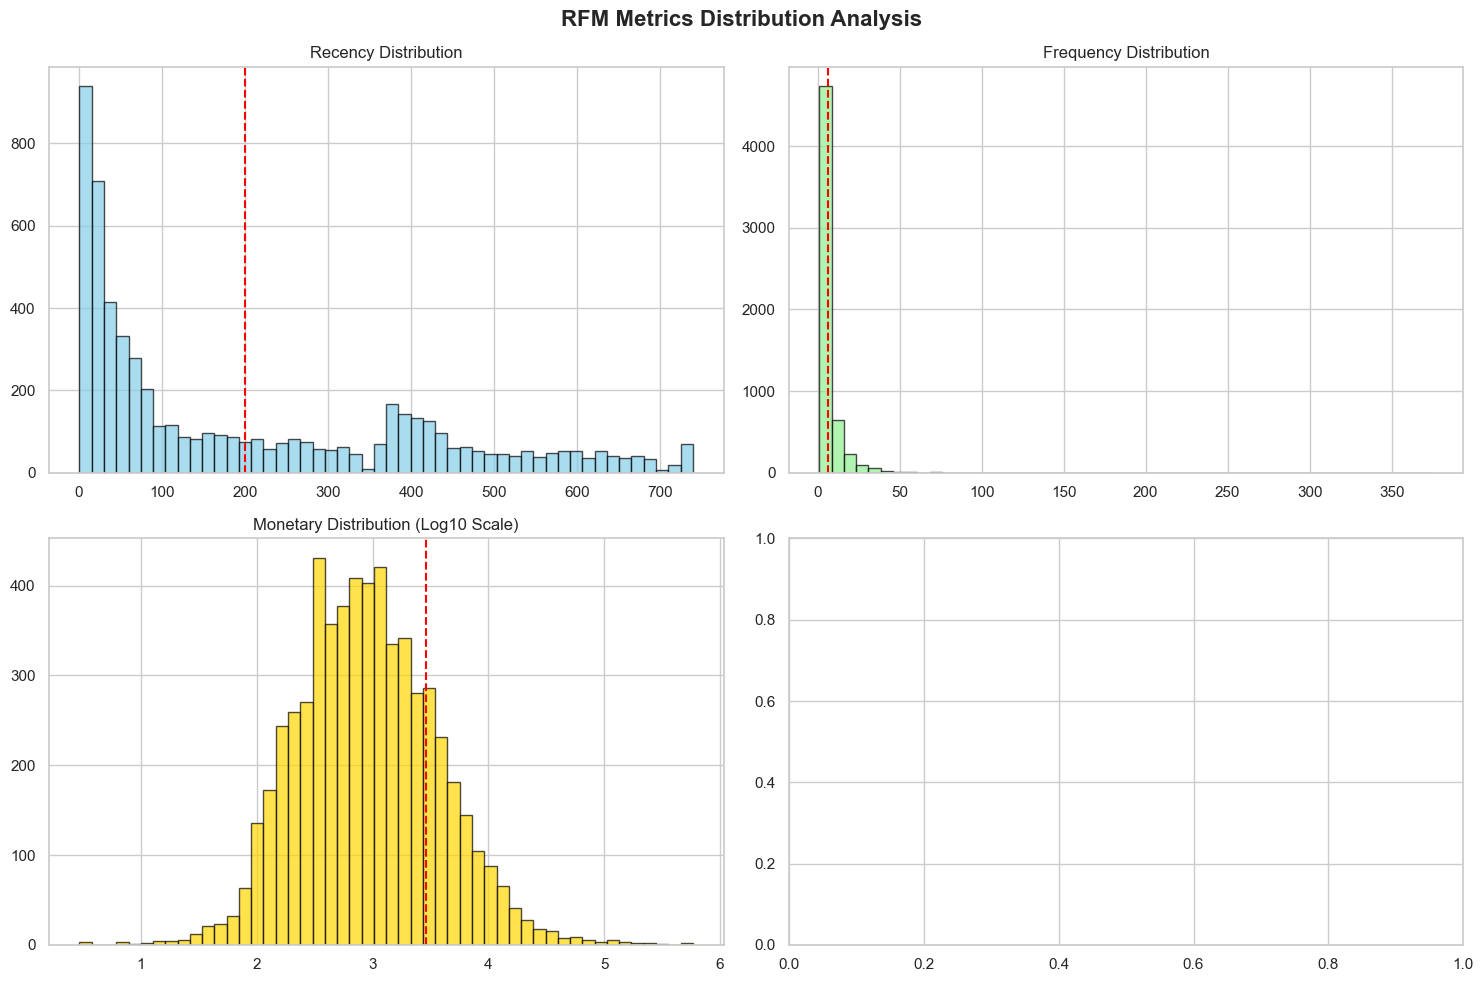

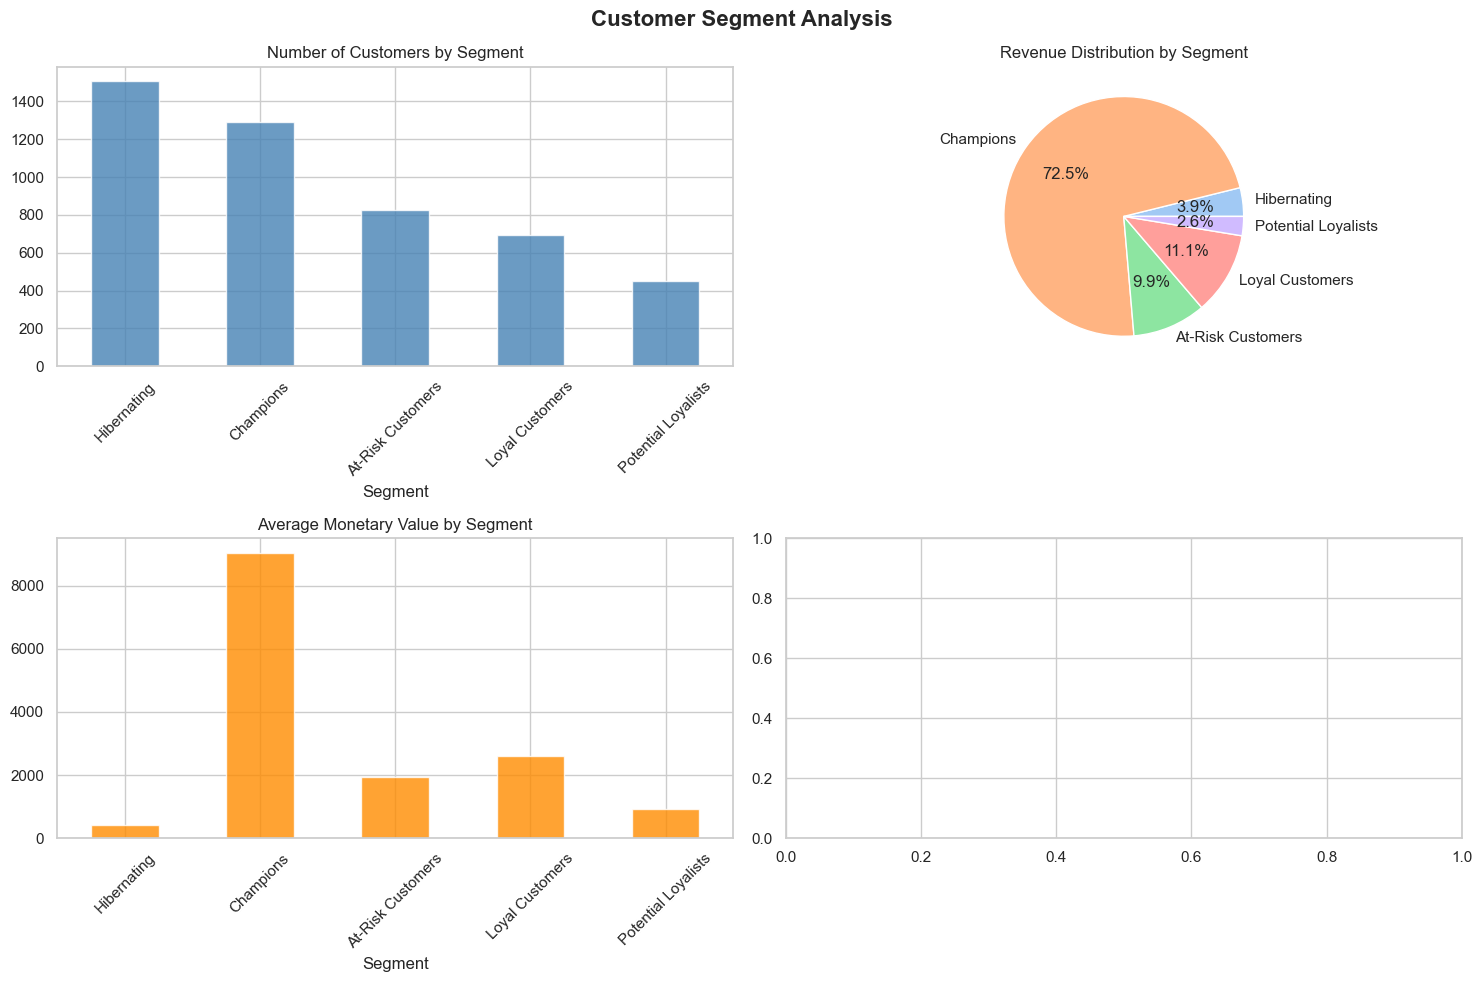

In [11]:
# Generate comprehensive visualizations
figures = generate_visualizations(rfm_final, segment_summary)

print("📊 All visualizations generated successfully!")
print(f"Generated {len(figures)} visualization sets:")
for fig_name in figures.keys():
    print(f"• {fig_name.title()} Analysis")

**Analysis of RFM Distributions:**

- **Recency Distribution**: Shows the distribution of days since last purchase. A right-skewed distribution indicates most customers purchased recently, with a tail of customers who haven't purchased in a long time.

- **Frequency Distribution**: Displays the number of transactions per customer. Typically right-skewed, showing most customers make few purchases, while a small group makes many purchases.

- **Monetary Distribution (Log Scale)**: Shows customer spending patterns. The log scale helps visualize the wide range of spending behaviors and potential bimodal distribution suggesting retail vs. wholesale customers.

**Segment Analysis Insights:**

- **Customer Count by Segment**: Shows the relative size of each customer segment
- **Revenue Distribution**: Reveals which segments contribute most to total revenue
- **Average Monetary Value**: Identifies the highest-spending segments

### 3.5 Export Results
---
#### Export to Excel and Save charts

In [12]:
# Export comprehensive results to Excel and 
export_results(rfm_final, segment_summary)

📊 Creating RFM distribution plots...
🎯 Creating segment analysis plots...
📁 Chart saved: ../figures/rfm_charts/distributions.png
📁 Chart saved: ../figures/rfm_charts/segments.png
✅ Results exported to ../results/phase_3/rfm_analysis_results.xlsx


#### Export Key DataFrames for Integration

In [13]:
# Save key results for integration with other phases
output_dir = "../results/phase_3/"
os.makedirs(output_dir, exist_ok=True)

# Save individual CSV files
rfm_final.to_csv(f"{output_dir}rfm_customer_segments.csv", index=False)
segment_summary.to_csv(f"{output_dir}segment_summary_statistics.csv")

print(f"📁 Results saved to {output_dir}")
print("Files created:")
print("• rfm_customer_segments.csv")
print("• segment_summary_statistics.csv")

📁 Results saved to ../results/phase_3/
Files created:
• rfm_customer_segments.csv
• segment_summary_statistics.csv


# Phase 4: Strategic Recommendations
---

**Team:** Code Serpents

**Team Member:** K. D. Vihanga Heshan Bandara

---

## Executive Summary

This notebook translates analytical findings into actionable business strategies. It investigates the wholesaler hypothesis and provides data-driven recommendations for customer segmentation, marketing strategies, and business growth opportunities.

## Objectives

1. **Wholesaler Analysis**: Investigate purchasing behavior differences between wholesalers and retail customers
2. **Segment Strategy**: Develop targeted strategies for each RFM customer segment
3. **Strategic Recommendations**: Provide actionable insights for marketing, inventory, and customer relationship management

---

# Phase 5: Data Enrichment via API Integration
---

**Team:** Code Serpents

**Team Member:** K. Lahiru Chanaka

---

## Executive Summary

This notebook demonstrates advanced data acquisition skills by integrating external currency exchange data through API calls. The enrichment enhances the dataset for international financial reporting and regional pricing strategies.

## Objectives

1. **API Integration**: Connect to a free currency conversion API using requests library
2. **Data Enrichment**: Convert transaction values to USD and EUR for top transactions
3. **Business Value**: Demonstrate the practical application of external data integration for international business operations

---